# Boxplot

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackrnd.figure_format = 'retina'

In [32]:
tips = sns.load_dataset('tips')
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


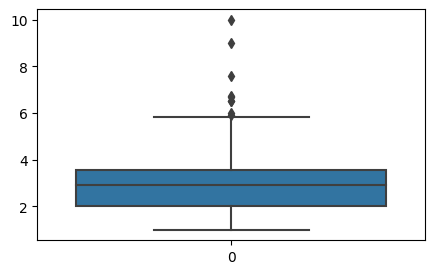

In [33]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(tips['tip'])
plt.show();

## 박스플롯(Boxplot)
- 25% 제1사분위수(Q1)
- 75% 제3분위수(Q3)
- 50% 중앙값(Q2)
- IQR(50%)
- 최댓갑, 최솟갑
- upper fence, lower fence
- 이 펜스들을 넘어가면 아웃라이어 이상치라고 함

### 분위수 값 구하기
1. 데이터를 오름차순 정렬
2. 오름차순 정렬한 데이터의 크기(길이 ,갯수)를 구한다
3. 크기에 25%, 75%값을 곱한다
4. 정수로 반환
5. 인덱스 값 
    - 내 오름차순 정렬한 데이터에 인덱스 값을 넣으면
    - 그게 제1, 3 사분위수 값이다.

In [34]:
len(tips['tip'].values)

244

In [35]:
tips['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [36]:
datas = np.random.choice(range(3, 51), size =10, replace=False) ## True는 중복허용 False는 중복 제거

In [37]:
datas

array([50, 31, 47, 14, 45, 19, 40, 15, 49, 43])

In [47]:
my_data = pd.Series(datas)

In [66]:
## 25%와 75%의 값을 구해보자
## 25%, 75% 곱합니다
## 정수로 반환
## 
sorted_datas = my_data.sort_values()
sorted_datas.reset_index(drop=True, inplace=True)

In [89]:
## 인덱스 값 이 2임
q3 = sorted_datas[int(len(sorted_datas)*0.75)]
q1 = sorted_datas[int(len(sorted_datas)*0.25)]

In [90]:
my_data.describe()

count    10.00000
mean     35.30000
std      14.39946
min      14.00000
25%      22.00000
50%      41.50000
75%      46.50000
max      50.00000
dtype: float64

## 중앙값 구하기
1. 데이터를 오름차순 정렬합니다
2. 정렬된 데이터의 크기(길이, 갯수 , 몇개)를 구합니다
3. 크기가 홀수인 경우에는 중간 위치에 있는 값을 중앙값으로 선택합니다
4. 크기가 짝수인 경우에는 중간위치에 있는 두 값의 평균을 중앙값으로 선택합니다

In [91]:
datas = np.random.choice(range(3, 51), size=10, replace =False)
datas

array([23, 25, 43, 18, 46, 38, 16, 27, 30, 11])

In [92]:
c = pd.Series(datas)
d = c.sort_values()
d

9    11
6    16
3    18
0    23
1    25
7    27
8    30
5    38
2    43
4    46
dtype: int64

In [93]:
n = len(d)

if n % 2 == 1:
    median = sorted[n//2]
else:
    median = (d[n//2 - 1] + d[n//2])/2
median        

42.0

In [94]:
d.describe()

count    10.00000
mean     27.70000
std      11.64331
min      11.00000
25%      19.25000
50%      26.00000
75%      36.00000
max      46.00000
dtype: float64

In [95]:
# iqr 
iqr = q3- q1

In [96]:
iqr

28

In [97]:
upper_fence = q3 + (1.5 * iqr)
lower_fence = q1 - (1.5 * iqr)

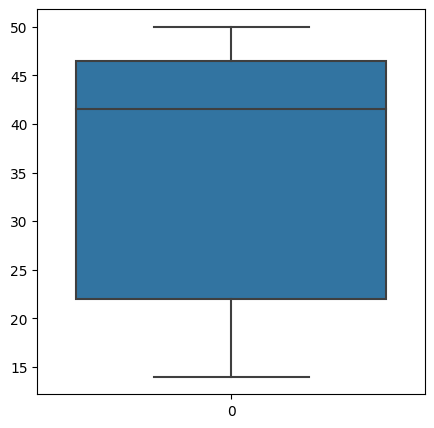

In [99]:
## 박스의 범위가 iqr을 의미함
fig, ax = plt.subplots(figsize = (5, 5))
sns.boxplot(my_data)
plt.show;